1. We train a model

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import os

In [34]:
# We define our datasets
train= '.../train'
test= '..../test'

batch_size = 32
image_size = (48, 48)  
num_classes = len(os.listdir(train))


In [35]:
# train ve test datamızla ilgili ayarları yapıyoruz.
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [36]:
# We make settings for the images in our train data.
train_generator = train_datagen.flow_from_directory(
    train,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'
)

Found 28709 images belonging to 7 classes.


In [37]:
# We make settings for the images in our test data.
test_generator = test_datagen.flow_from_directory(
    test,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'
)


Found 7178 images belonging to 7 classes.


In [38]:
class_labels = list(train_generator.class_indices.keys())
class_labels_encoded = to_categorical(list(range(num_classes)))

In [39]:
# We define our model.
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))


In [40]:
# We adjust the features of our model such as optimizer, loss, metrics.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
# We train our model.
history = model.fit(train_generator, epochs=150, validation_data=test_generator, callbacks=[checkpoint])

Epoch 1/150
898/898 [==============================] - 72s 79ms/step - loss: 1.6738 - accuracy: 0.3376 - val_loss: 1.4882 - val_accuracy: 0.4334
Epoch 2/150
898/898 [==============================] - 70s 78ms/step - loss: 1.4746 - accuracy: 0.4322 - val_loss: 1.3931 - val_accuracy: 0.4664
Epoch 3/150
898/898 [==============================] - 69s 77ms/step - loss: 1.3807 - accuracy: 0.4688 - val_loss: 1.3057 - val_accuracy: 0.5001
Epoch 4/150
898/898 [==============================] - 70s 77ms/step - loss: 1.3216 - accuracy: 0.4942 - val_loss: 1.2775 - val_accuracy: 0.5125
Epoch 5/150
898/898 [==============================] - 70s 78ms/step - loss: 1.2774 - accuracy: 0.5121 - val_loss: 1.2431 - val_accuracy: 0.5206
Epoch 6/150
898/898 [==============================] - 68s 75ms/step - loss: 1.2390 - accuracy: 0.5261 - val_loss: 1.2382 - val_accuracy: 0.5273
Epoch 7/150
898/898 [==============================] - 68s 76ms/step - loss: 1.2146 - accuracy: 0.5371 - val_loss: 1.2239 - val_ac

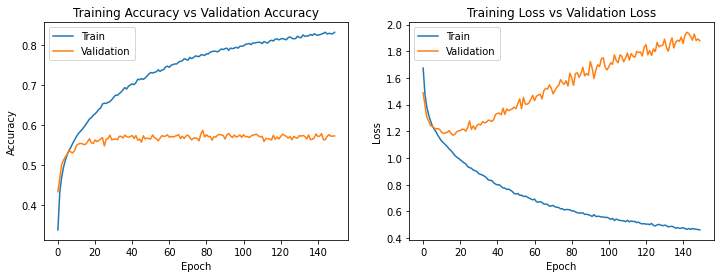

In [43]:
# We measure the success of our model according to epochs with graphs.
fig, ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [44]:
# We save our model.
model.save('EmotionModel1.h5')

2. We run our model

In [2]:
import cv2
from tensorflow.keras.models import load_model
import numpy as np
import mido
from mido import MidiFile, MidiTrack, Message
import pygame
import random

# We load the emotion analysis model
model = load_model('EmotionModel.h5')

# We start the video stream
cap = cv2.VideoCapture(0)

# Emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Variable to store the last selected emotion
last_emotion = None

# We initialize Pygame mixer
pygame.mixer.init()

# Function to play music
def play_music(file_path):
    pygame.mixer.music.load(file_path)
    pygame.mixer.music.play()

# Function to generate random notes
def generate_random_notes(num_notes):
    return [random.randint(55, 100) for _ in range(num_notes)]

# Function to create MIDI file with instruments
def create_midi_file_with_instruments(notes1, notes2, emotion, output_file="Emotion_Music.mid"):
    mid = MidiFile()

    # Tempo and time setting based on emotion
    if emotion == 'happy':
        time_value = 20
    elif emotion == 'neutral':
        time_value = 85
    elif emotion == 'sad':
        time_value = 125
    elif emotion == 'angry':
        time_value = 110
    elif emotion == 'disgust':
        time_value = 100
    elif emotion == 'fear':
        time_value = 90
    elif emotion == 'surprise':
        time_value = 40
    
    # Piano for the first channel
    track1 = MidiTrack()
    mid.tracks.append(track1)
    for note in notes1:
        track1.append(Message('note_on', note=note, velocity=64, time=time_value))
        track1.append(Message('note_off', note=note, velocity=64, time=time_value))

    # Guitar for the second channel
    track2 = MidiTrack()
    mid.tracks.append(track2)
    for note in notes2:
        track2.append(Message('note_on', note=note, velocity=64, time=time_value))
        track2.append(Message('note_off', note=note, velocity=64, time=time_value))

    mid.save(output_file)

while True:
    ret, frame = cap.read()
    roi = cv2.resize(frame, (48, 48))
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = np.expand_dims(np.expand_dims(roi, -1), 0)

    predictions = model.predict(roi)
    emotion = emotion_labels[np.argmax(predictions)]

    cv2.putText(frame, f'Emotion: {emotion}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow('Emotion Analysis', frame)

    key = cv2.waitKey(1)
    if key == 27:
        break  # Exit the loop
    elif key == 13:  # When the Enter key is pressed
        last_emotion = emotion
        piano_notes = generate_random_notes(20)
        guitar_notes = generate_random_notes(20)

        # We create and play the music file with emotion-specific name
        music_file_name = f"{last_emotion.capitalize()}.mid"
        create_midi_file_with_instruments(piano_notes, guitar_notes, last_emotion.lower(), output_file=music_file_name)
        play_music(music_file_name)

# Release the camera and close the window
cap.release()
cv2.destroyAllWindows()

# We print the last selected emotion
print(f"Last selected emotion: {last_emotion}")


1/1 [==============================] - 0s 17ms/step
Last selected emotion: None
